In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Exploratory Data Analysis

In [2]:
df = pd.read_csv('palm_ffb.csv')

In [3]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [5]:
df.shape

(130, 9)

In [6]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [7]:
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

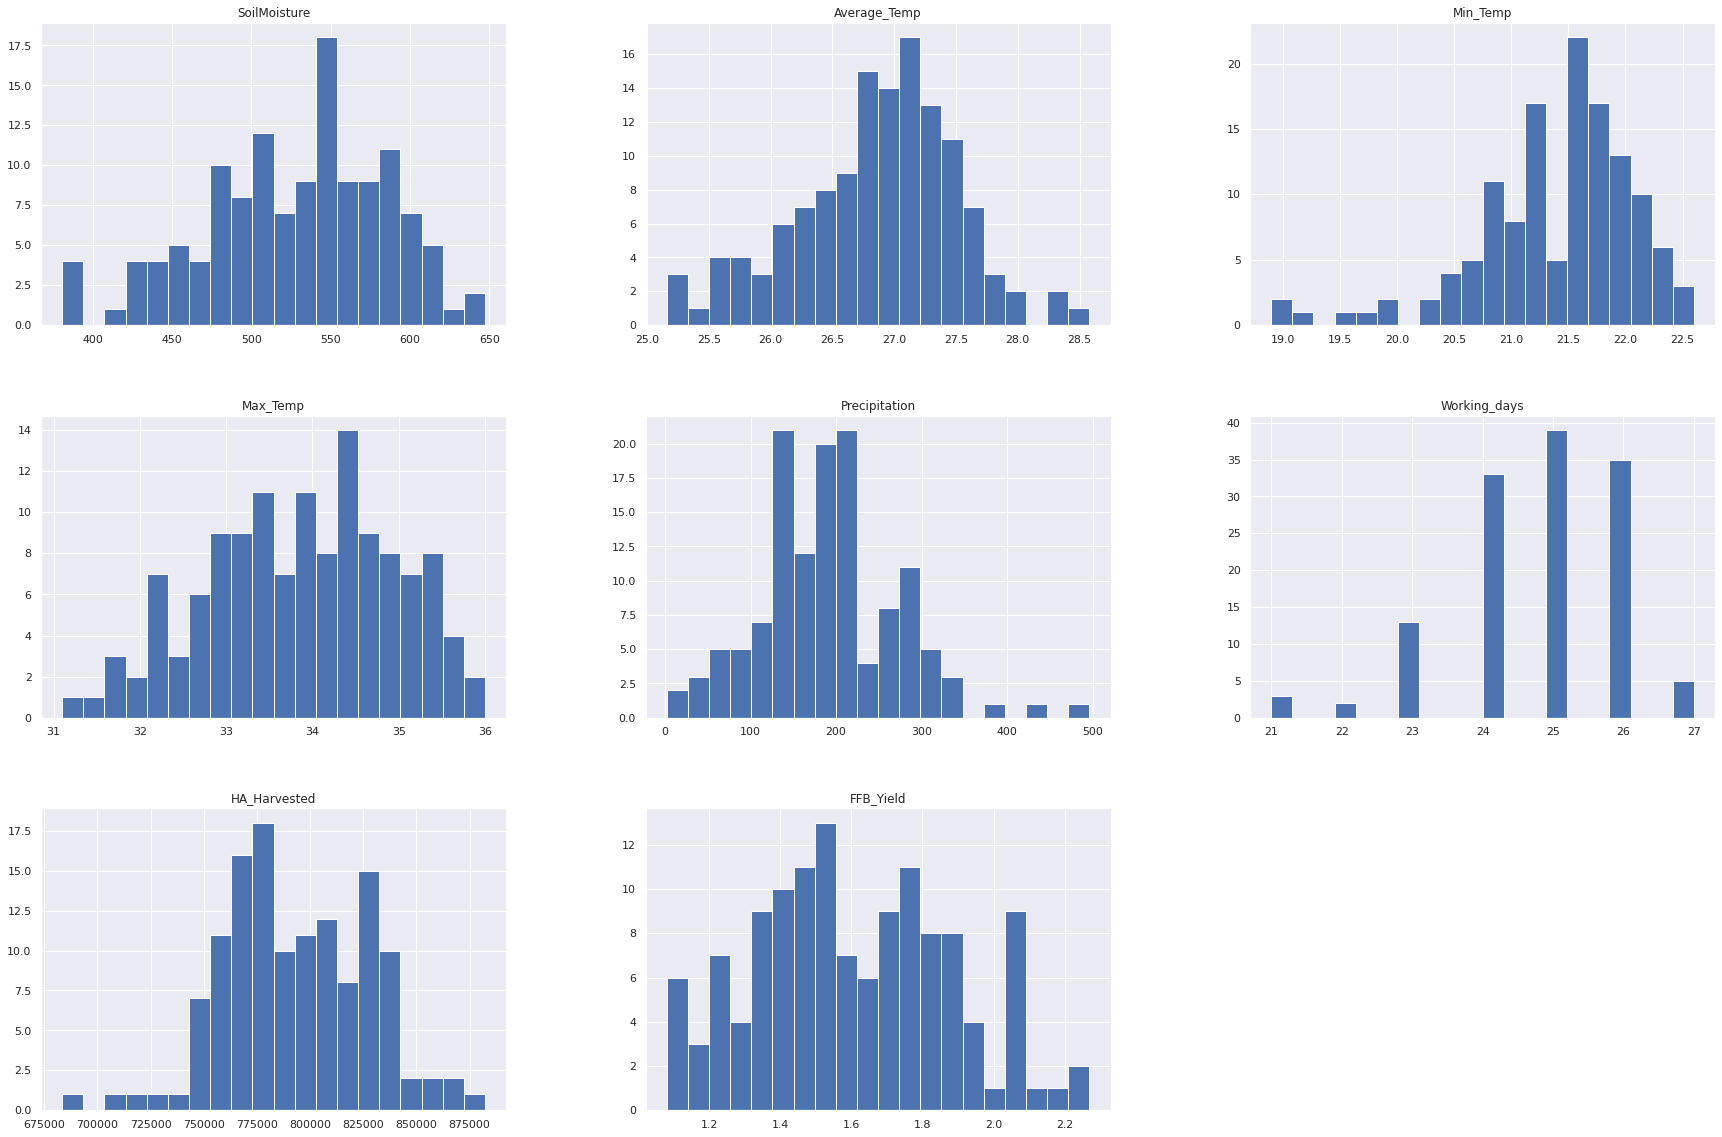

In [8]:
# Distribution
df.hist(bins=20, figsize=(30,20))
plt.show()

EDA has been performed to check the quality of the data. There is no missing value. From the histogram, we can observe most of the features are continuous variable except Working_days which is a discrete variable

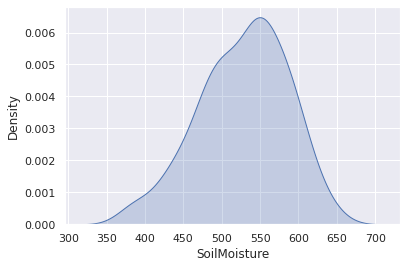

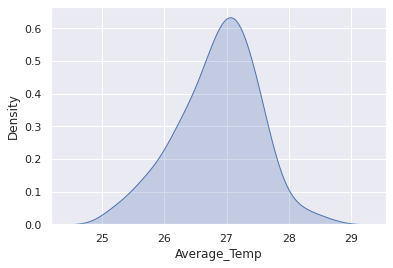

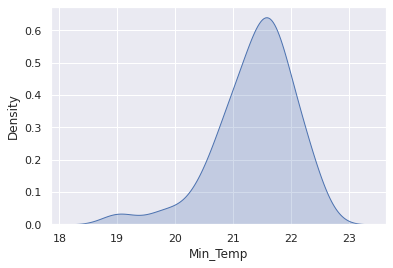

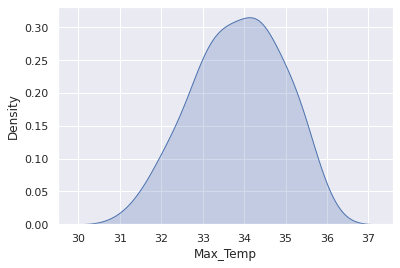

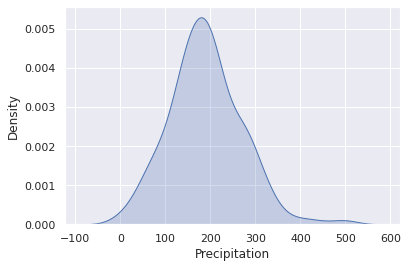

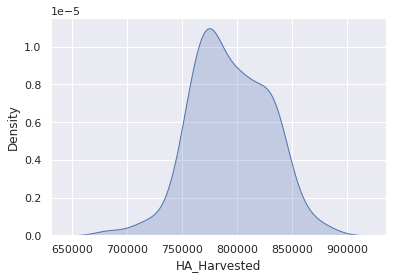

In [9]:
# Continuous Variable Distribution
vars = ['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','HA_Harvested']
def density_plot (data, var):
  data = data.copy()
  sns.kdeplot(data[var], shade=True, color="b")
  plt.show()

for var in vars:
  density_plot(df, var)

In [10]:
skewness = df.skew() 
kurtosis = df.kurt()

data = {'Skewness': skewness, 'Kurtosis': kurtosis} 
  
df_skew_kurt = pd.DataFrame(data)
print(df_skew_kurt)

               Skewness  Kurtosis
SoilMoisture  -0.394336 -0.262867
Average_Temp  -0.340606  0.141138
Min_Temp      -1.121358  2.000500
Max_Temp      -0.215635 -0.591251
Precipitation  0.526227  1.206761
Working_days  -0.660814  0.565301
HA_Harvested  -0.064445  0.085981
FFB_Yield      0.188629 -0.670960


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


From the density plot and the skewness statistics, most of the features are moderate left-skewed

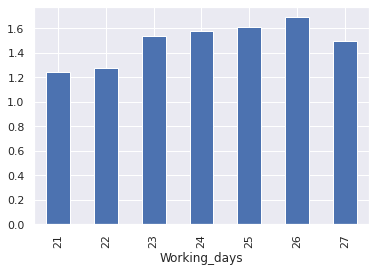

In [11]:
# To investigate the relationship between discrete variable and the target "FFB_Yield"

def discrete (data, var):
  data = data.copy()
  data.groupby(var)['FFB_Yield'].median().plot.bar()
  plt.show()

discrete(df, 'Working_days')

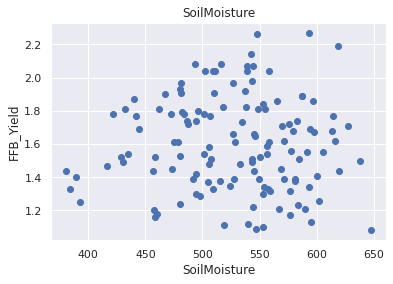

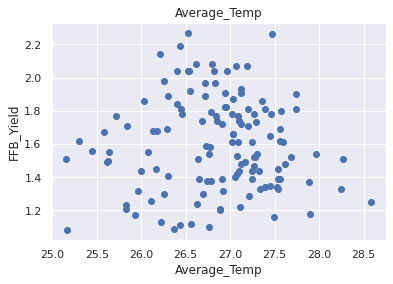

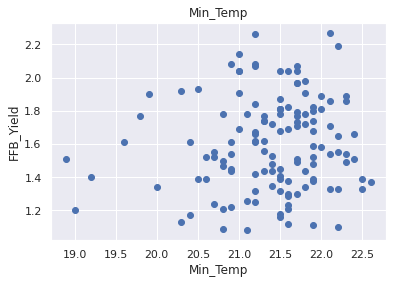

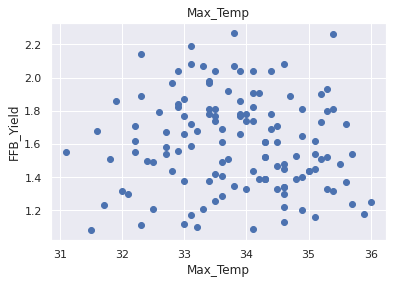

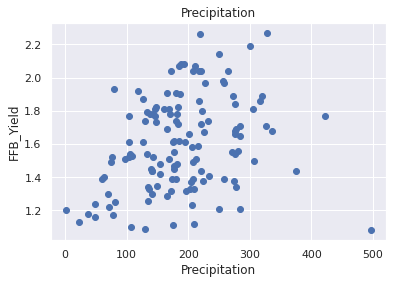

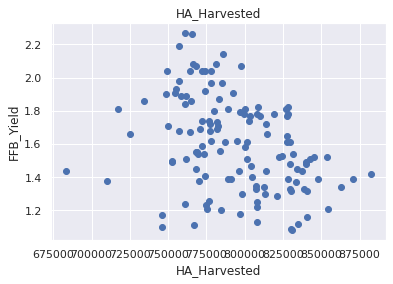

In [12]:
# To investigate the relationship between continuous variables and the target 'FFB_Yield'
cont_var = [variable for variable in df.columns if variable not in ['Date'] + ['Working_days'] + ['FFB_Yield']]

for var in cont_var:
  data = df.copy()
  plt.scatter(data[var], data['FFB_Yield'])
  plt.xlabel(var)
  plt.ylabel('FFB_Yield')
  plt.title(var)
  plt.show()

The scatter plots show the relationship between the continuous variable and FFB_Yield. The data points of Max_Temp, SoilMoisture and Average_Temp are scattered and there is a weak relationship with FFB_Yield which is later proven by the correlation coefficient

Correlation Analysis

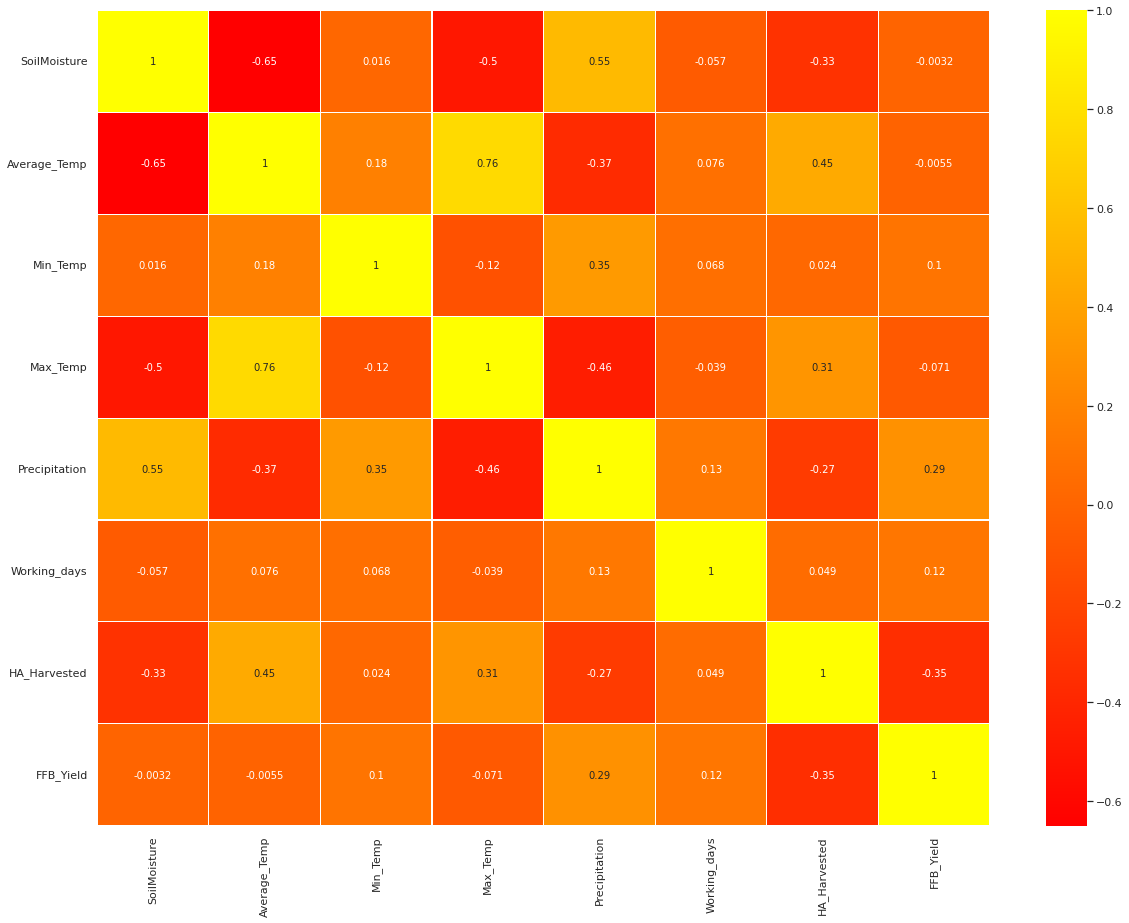

In [13]:
sns.heatmap(df.corr(), annot=True,  cmap='autumn', linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

From the above heatmap, features such as Working_days, Precipitation, Min_Temp (low temperature) have positive correlation with FFB_Yield whereas features such as HA_Harvested, Max_Temp (high temperature), SoilMoisture have negative correlation with FFB_Yield.

Features such as Average_Temp & Max_Temp, SoilMoisture & Precipitation are highly correlated. A coefficient value of 0.76 indicates there is a presence of multi-collinearity between Average_Temp & Max_Temp.

**Supervised Feature Selection**

Given the labeled data, FFB_Yield, we are going to identify the relevant features to increase the efficiency of supervised models especially handling large dataset. The first technique being applied is:

Method 1: Fisher Score








Working_days     0
Average_Temp     1
SoilMoisture     2
Min_Temp         3
HA_Harvested     4
Precipitation    5
Max_Temp         6
dtype: int64


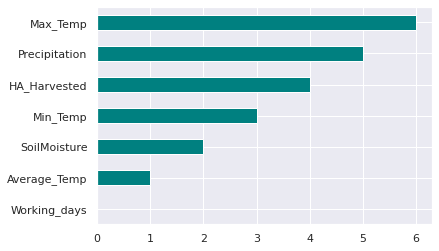

In [15]:
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

array = df.values
X = array[:, 1:8] # select the features
Y = array[:, 8] # target variable

ranks = fisher_score.fisher_score(X,Y) # return ranks of the features

fisher_imp = pd.Series(ranks, df.columns[1:len(df.columns)-1])
fisher_imp = fisher_imp.sort_values()
fisher_imp.plot(kind='barh', color='teal')
print(fisher_imp)
plt.show()

From the graph, we can observe that the significant features are Max_Temp (Rank 1), Precipitation (Rank 2), HA_Harvested (Rank 3), Min_temp (Rank 4). Meanwhile, Working_days has no importance.

Let's apply the other technique to check on the importances:

Method 2: Random Forest 

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['FFB_Yield', 'Date'],axis=1)
Y = df.FFB_Yield

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)

rf_imp=pd.DataFrame(rf.feature_importances_,columns=["randomforest"], index=X.columns)
rf_imp
rf_imp.sort_values(['randomforest'], ascending=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50building tree 22 of 50

building tree 23 of 50building tree 24 of 50

building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50building tree 34 of 50
building tree 35 of 50
building tree 36 of 50

building tree 37 of 50building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50

building tree 43 of 50building tree 44 of 5

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


,randomforest
HA_Harvested,0.338938
Precipitation,0.236271
Average_Temp,0.144919
SoilMoisture,0.102004
Max_Temp,0.079065
Min_Temp,0.063199
Working_days,0.035605


When applying the random forest, Min_Temp and Max_Temp have dropped and replaced by Average_Temp meanwhile HA_Harvested, Precipitation and SoilMoisture have higher importances

Method 3: Recursive Feature Elimination

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_rgs = LinearRegression(normalize=True)
linear_rgs.fit(X,Y)

rfe = RFE(linear_rgs, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)

rfe_imp=pd.DataFrame(rfe.ranking_,columns=["rfe"], index=X.columns)
rfe_imp
rfe_imp.sort_values(['rfe'], ascending=False)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,rfe
HA_Harvested,7
Average_Temp,6
SoilMoisture,5
Min_Temp,4
Precipitation,3
Max_Temp,2
Working_days,1


Finally, the RFE method further emphasized the importance of HA_Harvested, Average_Temp and SoilMoisture as well as Precipitation.


*   Naturally, the increase in HA_Harvested has a direct positive impact to the yield of FFB. The more HA is harvested, the more FFB is collected

But, how about the other features?

*   Temperature and Precipitation are the other 2 important factors which determining the quality of oil palm plantation. Oil palm requires at least 80% of humidity for optimum growth. The optimal temperature for oil palm are between 20°C (minimum) and 33°C (maximum). 
*   Moist soils are ideal for oil palm plantation. It grows best in areas with sufficient soil moisture all year round. Therefore, countries with tropical climates such as Malaysia, Indonesia, and Thailand are among the biggest exporter of oil palm.



